In [1]:
# QGB layer 1 circuit
from qiskit import *
from numpy import pi


Figure 3: A Quantum circuit analogue of the physical peg in figure 2. Qubit q2 is the input
channel or ‘ball’ and meters (measurements) indicate the output channels of the ‘quantum
peg’.

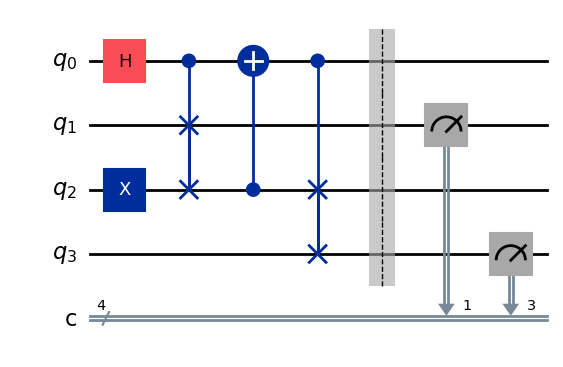

In [2]:

qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.x(qreg_q[2])
circuit.cswap(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.cx(qreg_q[2], qreg_q[0])
circuit.cswap(qreg_q[0], qreg_q[2], qreg_q[3])
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[3], creg_c[3])

circuit.draw("mpl")

Figure 4: A Quantum circuit analogue of the physical peg in figure 2. A 3-peg (2 level) version of a QGB.

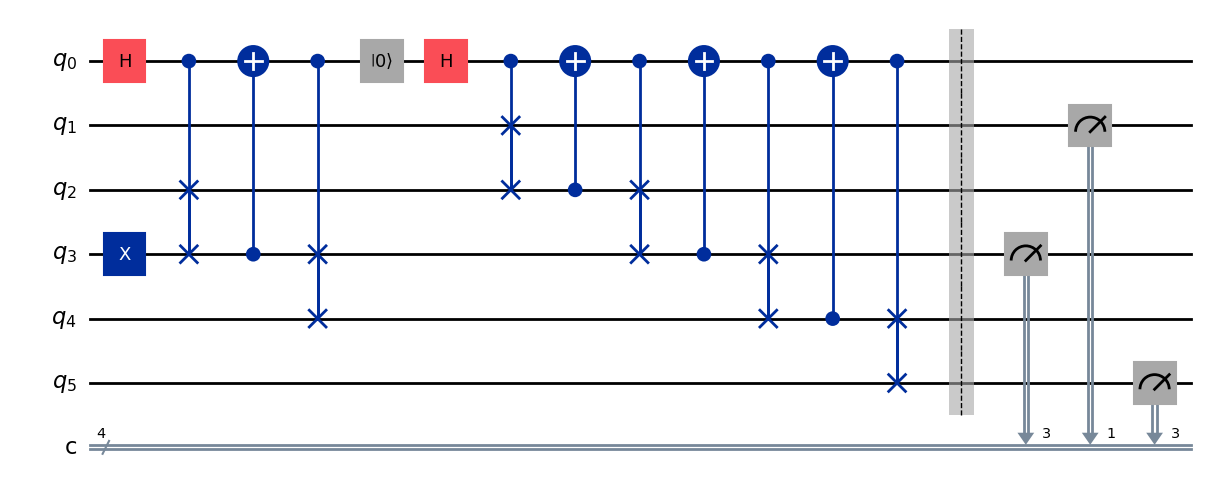

In [3]:
qreg_q1 = QuantumRegister(6, 'q')
creg_c1 = ClassicalRegister(4, 'c')
circuit1 = QuantumCircuit(qreg_q1, creg_c1)

circuit1.h(qreg_q1[0])
circuit1.x(qreg_q1[3])
circuit1.cswap(qreg_q1[0], qreg_q1[2], qreg_q1[3])
circuit1.cx(qreg_q1[3], qreg_q1[0])
circuit1.cswap(qreg_q1[0], qreg_q1[3], qreg_q1[4])
circuit1.reset(qreg_q1[0])
circuit1.h(qreg_q1[0])
circuit1.cswap(qreg_q1[0], qreg_q1[1], qreg_q1[2])
circuit1.cx(qreg_q1[2], qreg_q1[0])
circuit1.cswap(qreg_q1[0], qreg_q1[2], qreg_q1[3])
circuit1.cx(qreg_q1[3], qreg_q1[0])
circuit1.cswap(qreg_q1[0], qreg_q1[3], qreg_q1[4])
circuit1.cx(qreg_q1[4], qreg_q1[0])
circuit1.cswap(qreg_q1[0], qreg_q1[4], qreg_q1[5])
circuit1.barrier(qreg_q1[0], qreg_q1[1], qreg_q1[2], qreg_q1[3], qreg_q1[4], qreg_q1[5])
circuit1.measure(qreg_q1[3], creg_c1[3])
circuit1.measure(qreg_q1[1], creg_c1[1])
circuit1.measure(qreg_q1[5], creg_c1[3])

circuit1.draw("mpl")

In [5]:
qasmstring = """ 
OPENQASM 2.0;
include "qelib1.inc";
qreg q[10];
creg c[10];
reset q[0];
x q[5];
rx(2*pi/3) q[0];
cswap q[0],q[4],q[5];
cx q[5],q[0];
cswap q[0],q[5],q[6];
reset q[0];
rx(2*pi/3) q[0];
cswap q[0],q[3],q[4];
cx q[4],q[0];
cswap q[0],q[4],q[5];
reset q[0];
rx(2*pi/3) q[0];
cswap q[0],q[5],q[6];
cx q[6],q[0];
cswap q[0],q[6],q[7];
barrier q[0],q[1],q[2],q[3],q[4];
barrier q[5],q[6],q[7],q[8],q[9];
reset q[0];
cx q[6],q[5];
rx(2*pi/3) q[0];
reset q[6];
cswap q[0],q[2],q[3];
cx q[3],q[0];
cswap q[0],q[3],q[4];
reset q[0];
rx(2*pi/3) q[0];
cswap q[0],q[4],q[5];
cx q[5],q[0];
cswap q[0],q[5],q[6];
reset q[0];
rx(2*pi/3) q[0];
cswap q[0],q[6],q[7];
cx q[7],q[0];
cswap q[0],q[7],q[8];
barrier q[0],q[1],q[2],q[3],q[4];
barrier q[5],q[6],q[7],q[8],q[9];
reset q[0];
cx q[5],q[4];
cx q[7],q[6];
rx(2*pi/3) q[0];
reset q[5];
reset q[7];
cswap q[0],q[1],q[2];
cx q[2],q[0];
cswap q[0],q[2],q[3];
reset q[0];
rx(2*pi/3) q[0];
cswap q[0],q[3],q[4];
cx q[4],q[0];
cswap q[0],q[4],q[5];
reset q[0];
rx(2*pi/3) q[0];
cswap q[0],q[5],q[6];
cx q[6],q[0];
cswap q[0],q[6],q[7];
reset q[0];
rx(2*pi/3) q[0];
cswap q[0],q[7],q[8];
cx q[8],q[0];
cswap q[0],q[8],q[9];
barrier q[0],q[1],q[2],q[3],q[4];
barrier q[5],q[6],q[7],q[8],q[9];
cx q[4],q[3];
cx q[6],q[5];
cx q[8],q[7];
reset q[4];
reset q[6];
reset q[8];
measure q[1] -> c[1];
measure q[2] -> c[2];
measure q[3] -> c[3];
measure q[4] -> c[4];
measure q[5] -> c[5];
measure q[6] -> c[6];
measure q[7] -> c[7];
measure q[8] -> c[8];
measure q[9] -> c[9];
"""


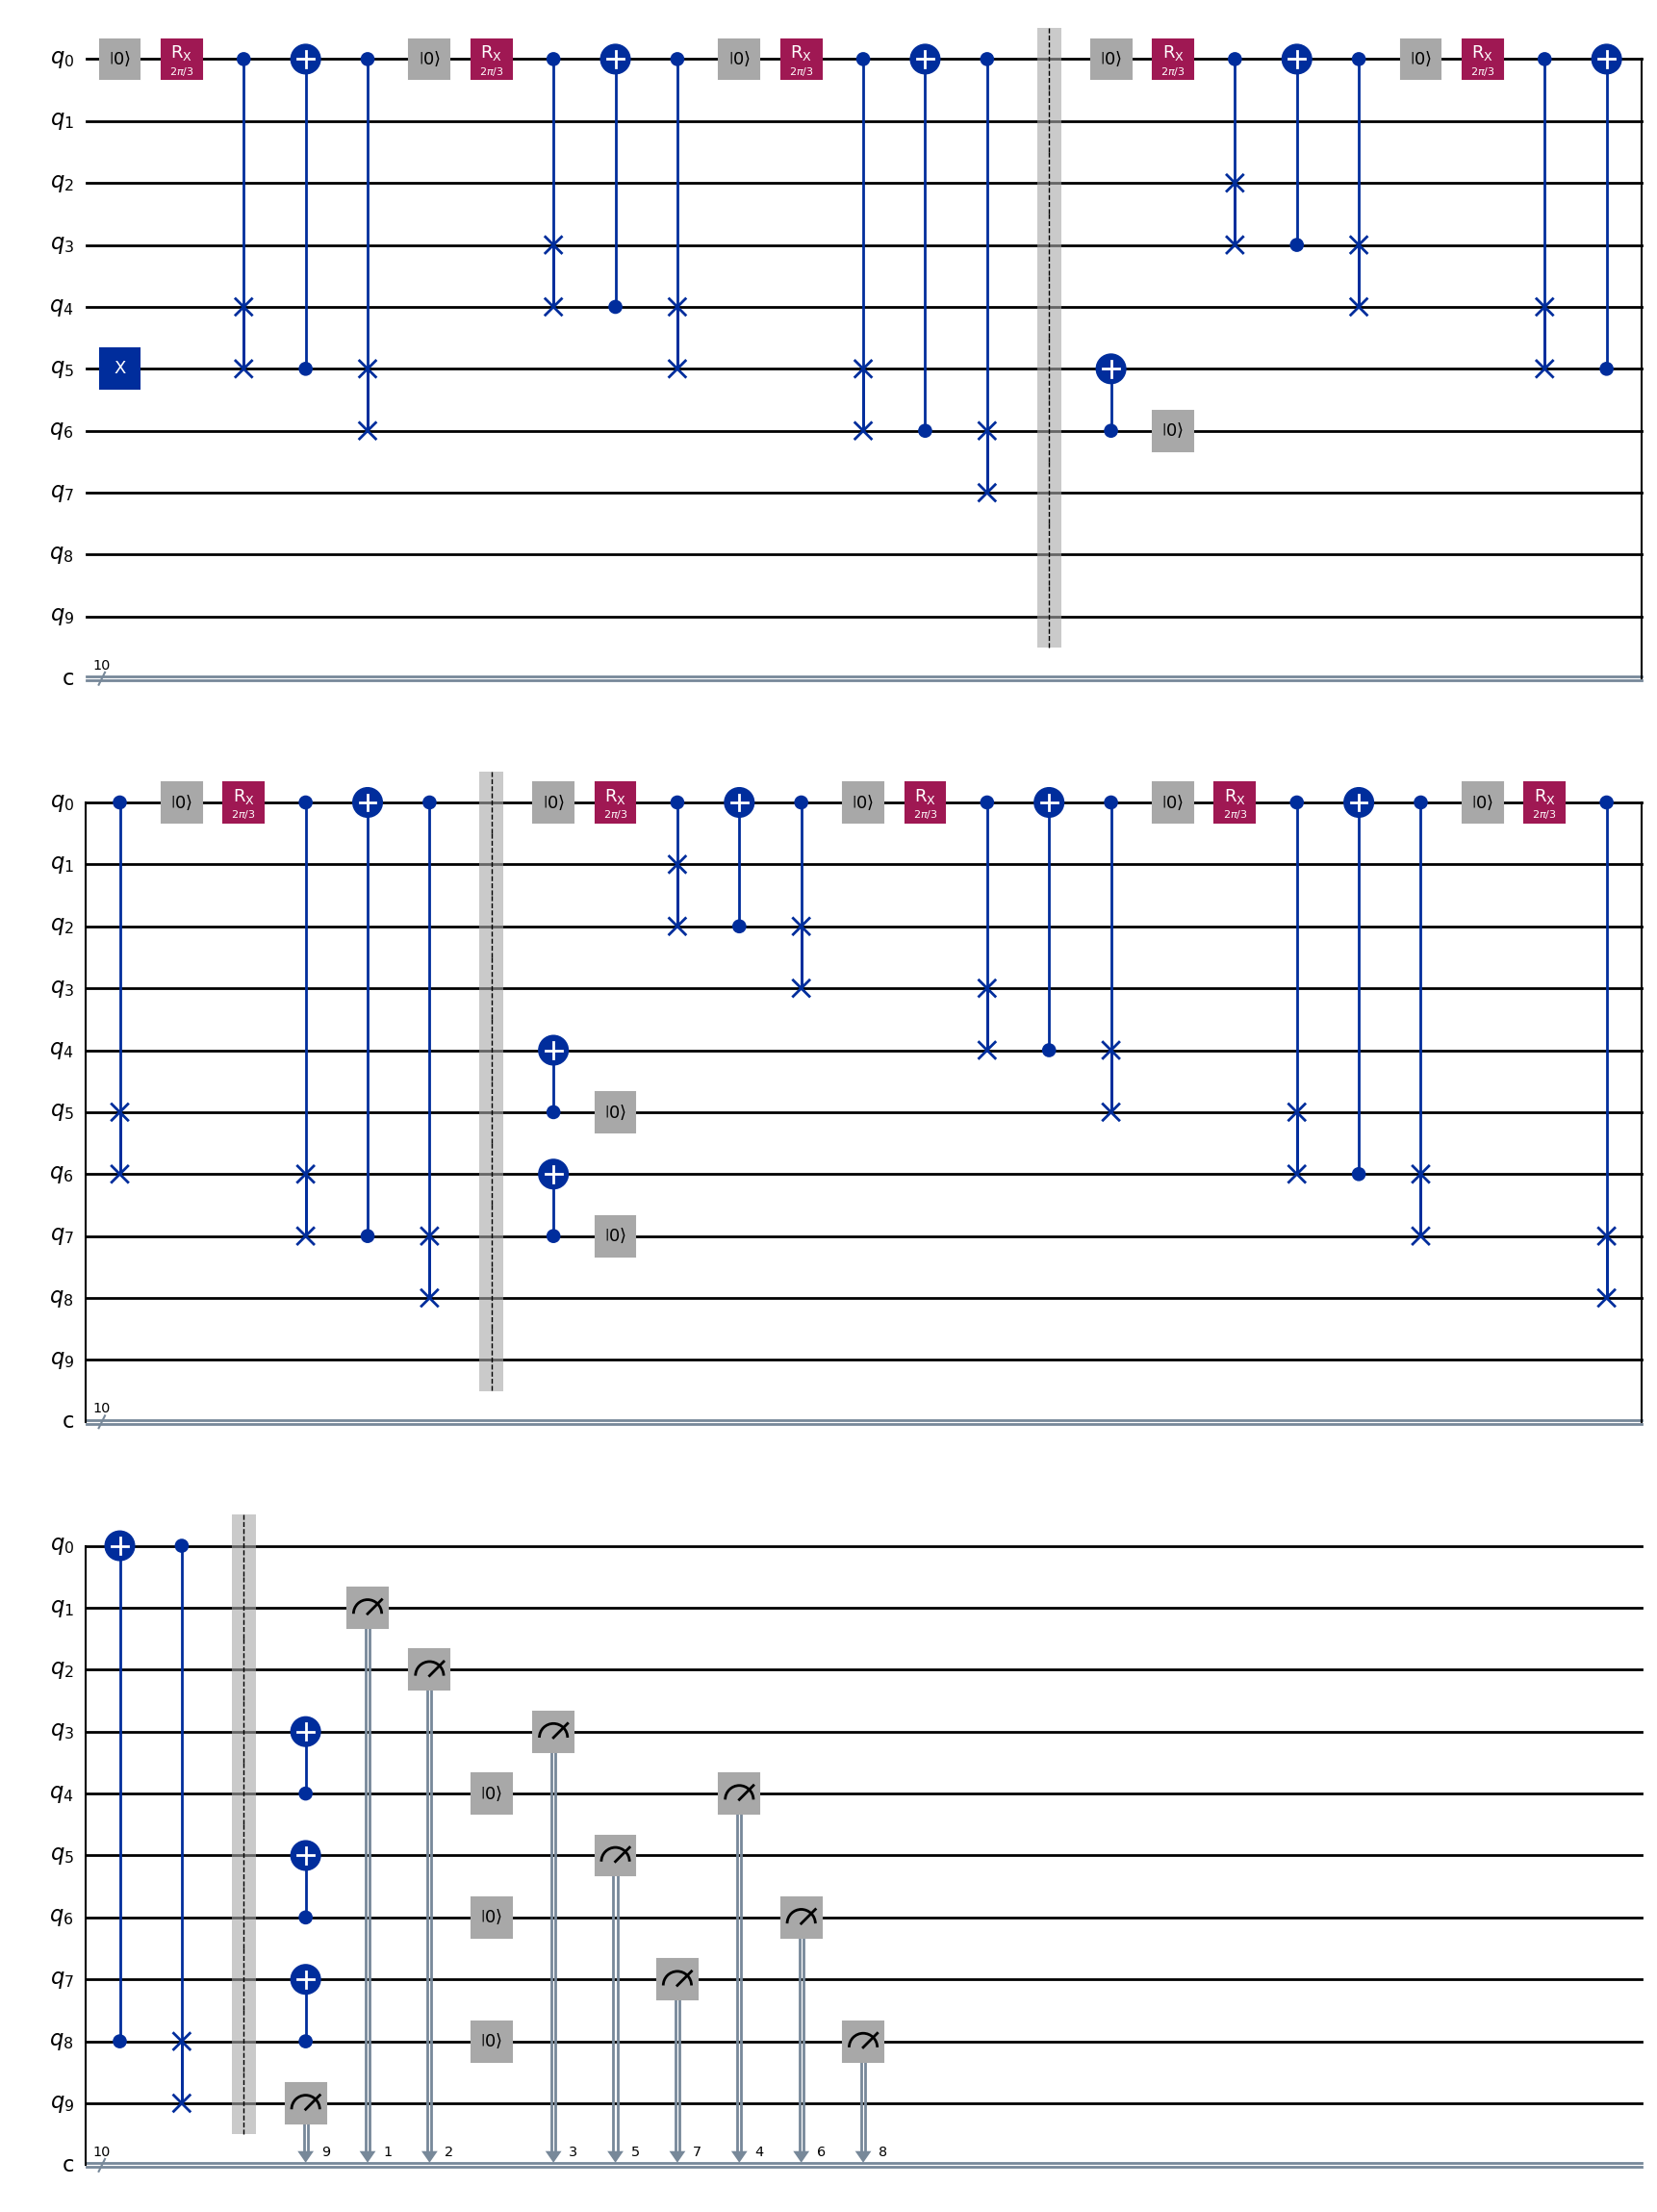

In [6]:
qc = QuantumCircuit.from_qasm_str(qasmstring)
qc.draw("mpl")